In [1]:
import glob
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
path = 'C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    print(file_)
    try:
        df = pd.read_csv(file_,index_col=None, header=0)
    except:
        df = pd.read_csv(file_,index_col=None, header=0, encoding = 'latin1')
    list_.append(df)
frame = pd.concat(list_)
counts = frame[' Label'].value_counts()
frame = frame.sample(frac=0.33, random_state=42, weights=frame[' Label'].replace(counts))
print(len(frame))

C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,21,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Monday-WorkingHours.pcap_ISCX.csv


c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,6,20,21,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Tuesday-WorkingHours.pcap_ISCX.csv
C:/Users/inbar&aryeh/Documents/academy/anomaly detection/cic/CSVs\Wednesday-workingHours.pcap_ISCX.csv


c:\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


1029384


In [4]:
import numpy as np

In [5]:
frame = frame.dropna(how = 'all')

In [6]:
frame[' Flow Packets/s'] = frame[' Flow Packets/s'].astype('float64')
frame['Flow Bytes/s'] = frame['Flow Bytes/s'].astype('float64')
frame = frame.drop(' Timestamp', axis = 1)
frame = frame.replace([np.inf, -np.inf], np.nan)

In [7]:
#frame = frame.merge(dest_ip_num, left_index = True, right_index = True)
#frame = frame.merge(src_ip_num, left_index = True, right_index = True)

In [8]:
non_trainable = ['weight', ' weight', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'External IP', ' Label', 'dest_a','dest_b','dest_c','dest_d','src_a','src_b', 'src_c','src_d']

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
label_mapping = {val: i for i, val in enumerate(list(frame[' Label'].drop_duplicates()))}


In [11]:
frame_mat = frame[[col for col in frame.columns if col != ' Label' and col not in non_trainable]].as_matrix()


c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

##### Creating binary label

In [14]:
y_binary = frame[' Label'].apply(lambda val: 1 if val != 'BENIGN' else 0).as_matrix()

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


##### creating timesteps dataset

In [15]:
import time
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(frame_mat), y_binary, test_size=0.2, shuffle=True, random_state=42, stratify=y_binary)
print(time.time() - start)

3.4914066791534424


In [16]:
seq_length = 2
dataX = []
dataY = []

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(np.nan_to_num(X_train), y_train)

In [18]:
# dataX = [X_res[i:i + seq_length] for i in range(len(X_res) - seq_length)]
# dataY = [y_res[i + seq_length - 1] for i in range(len(X_res) - seq_length)]
# data_X_tsteps = np.array(dataX)
# data_y_tsteps = np.array(dataY)

In [19]:
# testX = [X_test[i:i + seq_length] for i in range(len(X_test) - seq_length)]
# testY = [y_test[i + seq_length - 1] for i in range(len(X_test) - seq_length)]
# test_X_tsteps = np.array(testX)
# test_y_tsteps = np.array(testY)

In [29]:

scaled_X_res = X_res.reshape((X_res.shape[0], 1, X_res.shape[1]))
scaled_X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                37120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 39,233
Trainable params: 39,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 1617194 samples, validate on 20000 samples
Epoch 1/100
 - 68s - loss: 0.1852 - val_loss: 0.2291
Epoch 2/100
 - 61s - loss: 0.1647 - val_loss: 0.2124
Epoch 3/100
 - 61s - loss: 0.1600 - val_loss: 0.2068
Epoch 4/100
 - 61s - loss: 0.1558 - val_loss: 0.1566
Epoch 5/100
 - 63s - loss: 0.1551 - val_loss: 0.1915
Epoch 6/100
 - 61s - loss: 0.1542 - val_loss: 0.1955
Epoch 7/100
 - 61s - loss: 

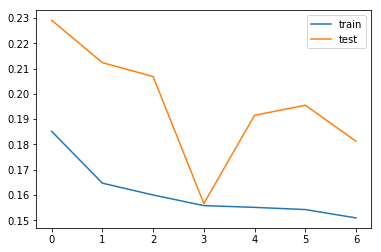

In [30]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from matplotlib import pyplot
# design network
model = Sequential()
model.add(LSTM(64 , input_shape=(scaled_X_res.shape[1], scaled_X_res.shape[2])))
model.add(Dense(32, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())
# fit network
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')
history = model.fit(scaled_X_res, y_res, epochs=100, batch_size=72, validation_data=(scaled_X_test[:20000], y_test[:20000]), verbose=2, shuffle=True, callbacks=[es])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
pred = model.predict(scaled_X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, list(map(lambda val: 1 if val > 0.5 else 0,pred))))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96    202149
          1       0.20      0.97      0.34      3728

avg / total       0.98      0.93      0.95    205877



In [ ]:
             precision    recall  f1-score   support

          0       1.00      0.93      0.96    202149
          1       0.20      0.97      0.34      3728

avg / total       0.98      0.93      0.95    205877
